## Applying "Deep Learning Model" on "mnist" dataset

In [24]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### To see Images!

In [3]:
from matplotlib.pyplot import imshow as plt

The Lable of this image is= 5


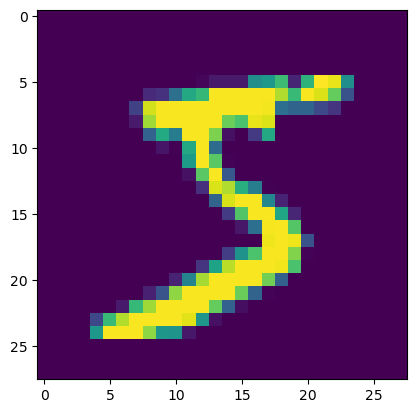

In [4]:
plt(train_images[0])
print(f'The Lable of this image is= {train_labels[0]}')

#### Checking how many images are for "Training" and how many are for "Testing"

In [5]:
print(f'For Training there are "{train_images.shape}" images')
print(f'For Testing there are "{test_images.shape}" images')

For Training there are "(60000, 28, 28)" images
For Testing there are "(10000, 28, 28)" images


In [6]:
from keras import models 
from keras import layers

#### Things That Everyone Should Know About Multiclass_Classification Problems:
* Last layer activation Function should always have to be "softmax"!
* The loss function should always have to be "categorical_crossentrophy" or "sparse_categorical_crossentrophy"!

So we are using "Sequential model" and assigning it to network, now we are going to create two layers(Dense layer)
1. In first layer I am using 521 neurons and input is 784(28 * 28)
2. In Second layer I am using 10 neuron cause there are 10 types of lables(0, 1, 2, 3,.......,9)

In [7]:
# This problem is "Multiclass_clasification problem"!

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Metrics:
* For Classification metrics will be "accuracy"!
* For Regression metrics will be "MSE"


#### Now we have to complile model!
I am using "rmsprop" as an optimizer (This optimizer can be use in any model!)

In [8]:
network.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Prepairing Image Data
* Since "Dense Layer" only works in one dimension, therefore we have to to reshape the matrics into one dimension (e.g. I converted the width and height in of matrix into area!).
* To convert the image value in-between 0s and 1s we have to divide the highest image with highest pixel value in the dataset!
* Since the image is 8-bit therefore: (0-2^8-1) This condition will be applied so that th answer will become 255!

In [9]:
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32') / 255    # Converting the value of pixels into 0s and 1s (Normalization)

test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

### Training The Model!
**The accuracy that I have achived while training the model is "98.90%"**
* The neural network will go through the entire training dataset five times (epochs = 5)!

In [10]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8745 - loss: 0.4397
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9668 - loss: 0.1151
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9776 - loss: 0.0735
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9849 - loss: 0.0507
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0378


### Testing Model!
**The Accuracy of while testing is "97.77%"**

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0755


In [12]:
print(f'Test Accuracy of This Model is = "{test_acc * 100}%"')

Test Accuracy of This Model is = "98.15000295639038%"


### Testing Model by Providing Images
**We Just have to enter The desire Image in Square Brackets and the model will predict the number for us!**

In [13]:
network.predict(train_images[12000].reshape(1,28 * 28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


7

In [15]:
network.save('Capcha_Identifier.keras')

In [26]:
import tensorflow as tf

In [32]:
loaded_model = keras.models.load_model('Capcha_Identifier.keras')

In [33]:
loaded_model.predict(train_images[12000].reshape(1,28 * 28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


7